In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore') #import libraries

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()#load mnist data

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)#data shape

Training Data Shape    :  (60000, 28, 28)
Training Labels  Shape :  (60000,)
Testing Data Shape     :  (10000, 28, 28)
Testing Labels Shape   :  (10000,)


(-0.5, 27.5, 27.5, -0.5)

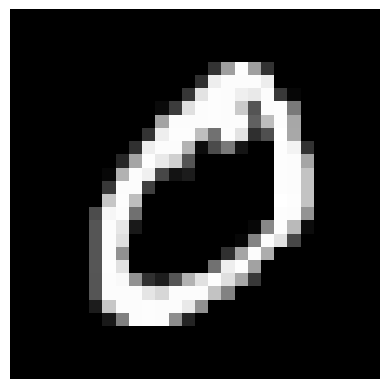

In [4]:
plt.imshow(x_train[1], cmap = 'gray')
plt.axis('off') #train image

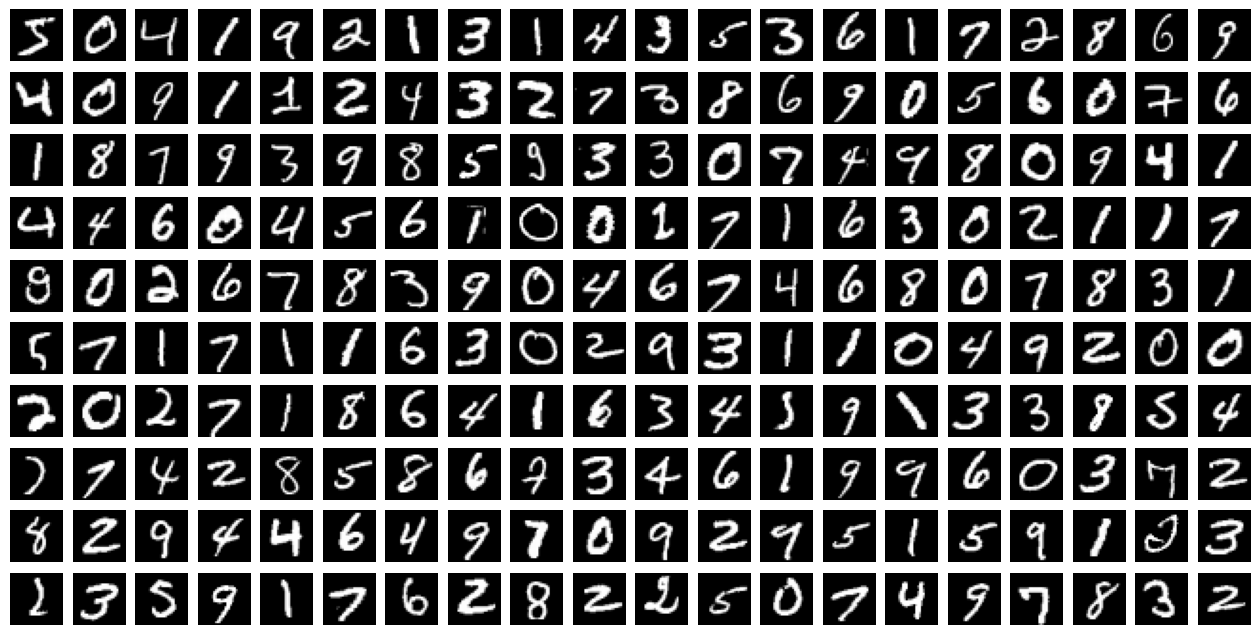

In [6]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off') #train image

In [7]:
# Normalizing
x_train = x_train/255
x_test  = x_test/255 #normalize image

In [8]:
y_train[:10] #1st 10values

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
# Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

In [10]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)#reshaping

In [11]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)#check shape

Training Data Shape    :  (60000, 28, 28, 1)
Training Labels  Shape :  (60000, 10)
Testing Data Shape     :  (10000, 28, 28, 1)
Testing Labels Shape   :  (10000, 10)


In [12]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()#model activation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [14]:
# Fit the model
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    batch_size = 1000,
    verbose = 1
)

Epoch 1/100
60/60 [==============================] - 2s 28ms/step - loss: 2.1865 - accuracy: 0.2288 - val_loss: 2.0067 - val_accuracy: 0.4631
Epoch 2/100
60/60 [==============================] - 1s 24ms/step - loss: 1.8359 - accuracy: 0.5853 - val_loss: 1.6333 - val_accuracy: 0.6737
Epoch 3/100
60/60 [==============================] - 1s 25ms/step - loss: 1.4651 - accuracy: 0.7020 - val_loss: 1.2723 - val_accuracy: 0.7492
Epoch 4/100
60/60 [==============================] - 1s 25ms/step - loss: 1.1519 - accuracy: 0.7622 - val_loss: 1.0059 - val_accuracy: 0.7958
Epoch 5/100
60/60 [==============================] - 1s 24ms/step - loss: 0.9336 - accuracy: 0.8019 - val_loss: 0.8287 - val_accuracy: 0.8253
Epoch 6/100
60/60 [==============================] - 3s 48ms/step - loss: 0.7884 - accuracy: 0.8247 - val_loss: 0.7109 - val_accuracy: 0.8428
Epoch 7/100
60/60 [==============================] - 2s 29ms/step - loss: 0.6900 - accuracy: 0.8401 - val_loss: 0.6299 - val_accuracy: 0.8537
Epoch 

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss'] #accuracy

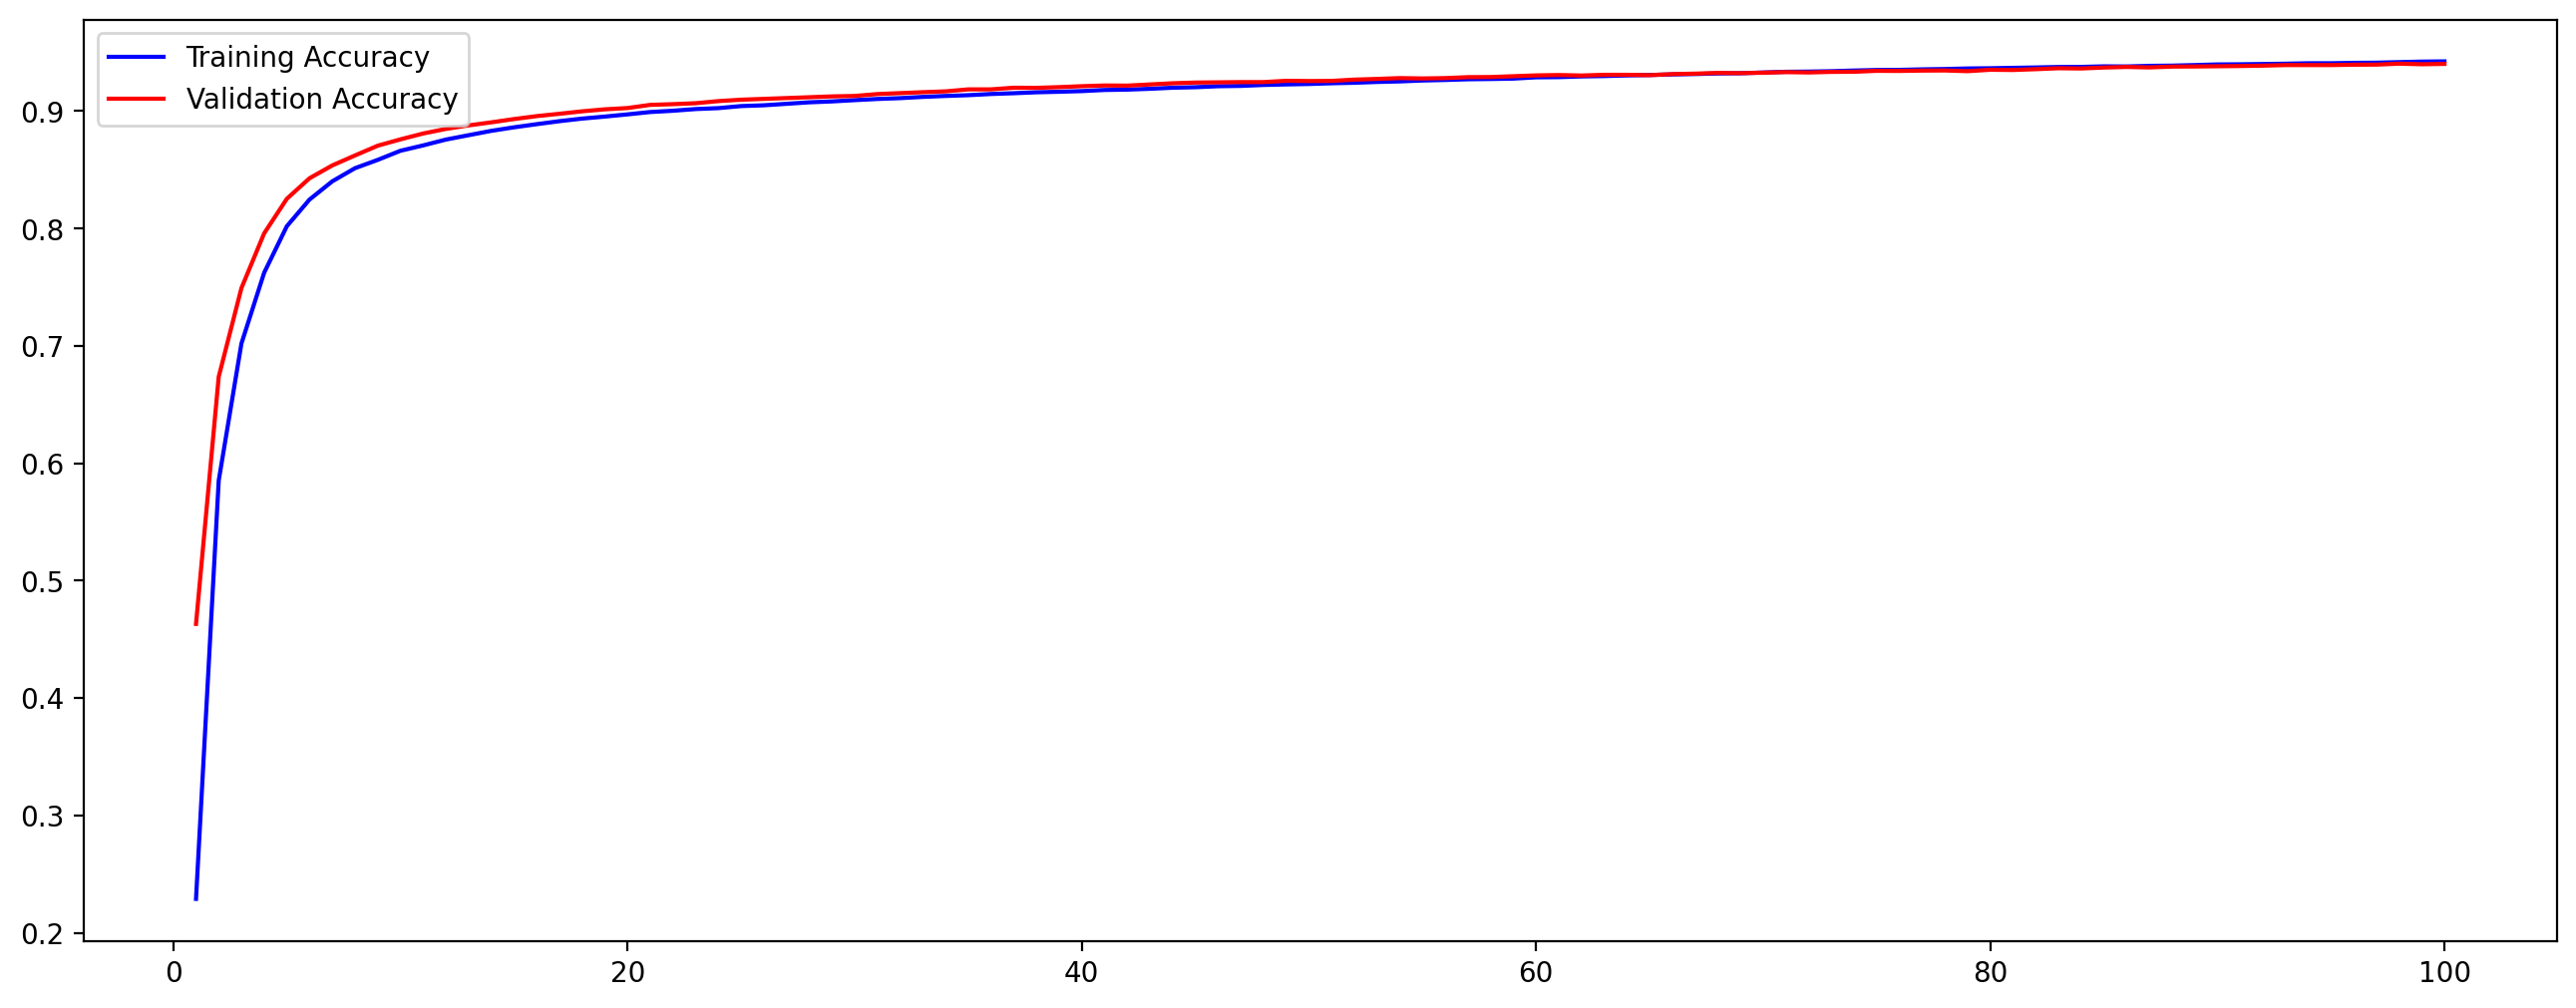

In [17]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend() #plot accuracy

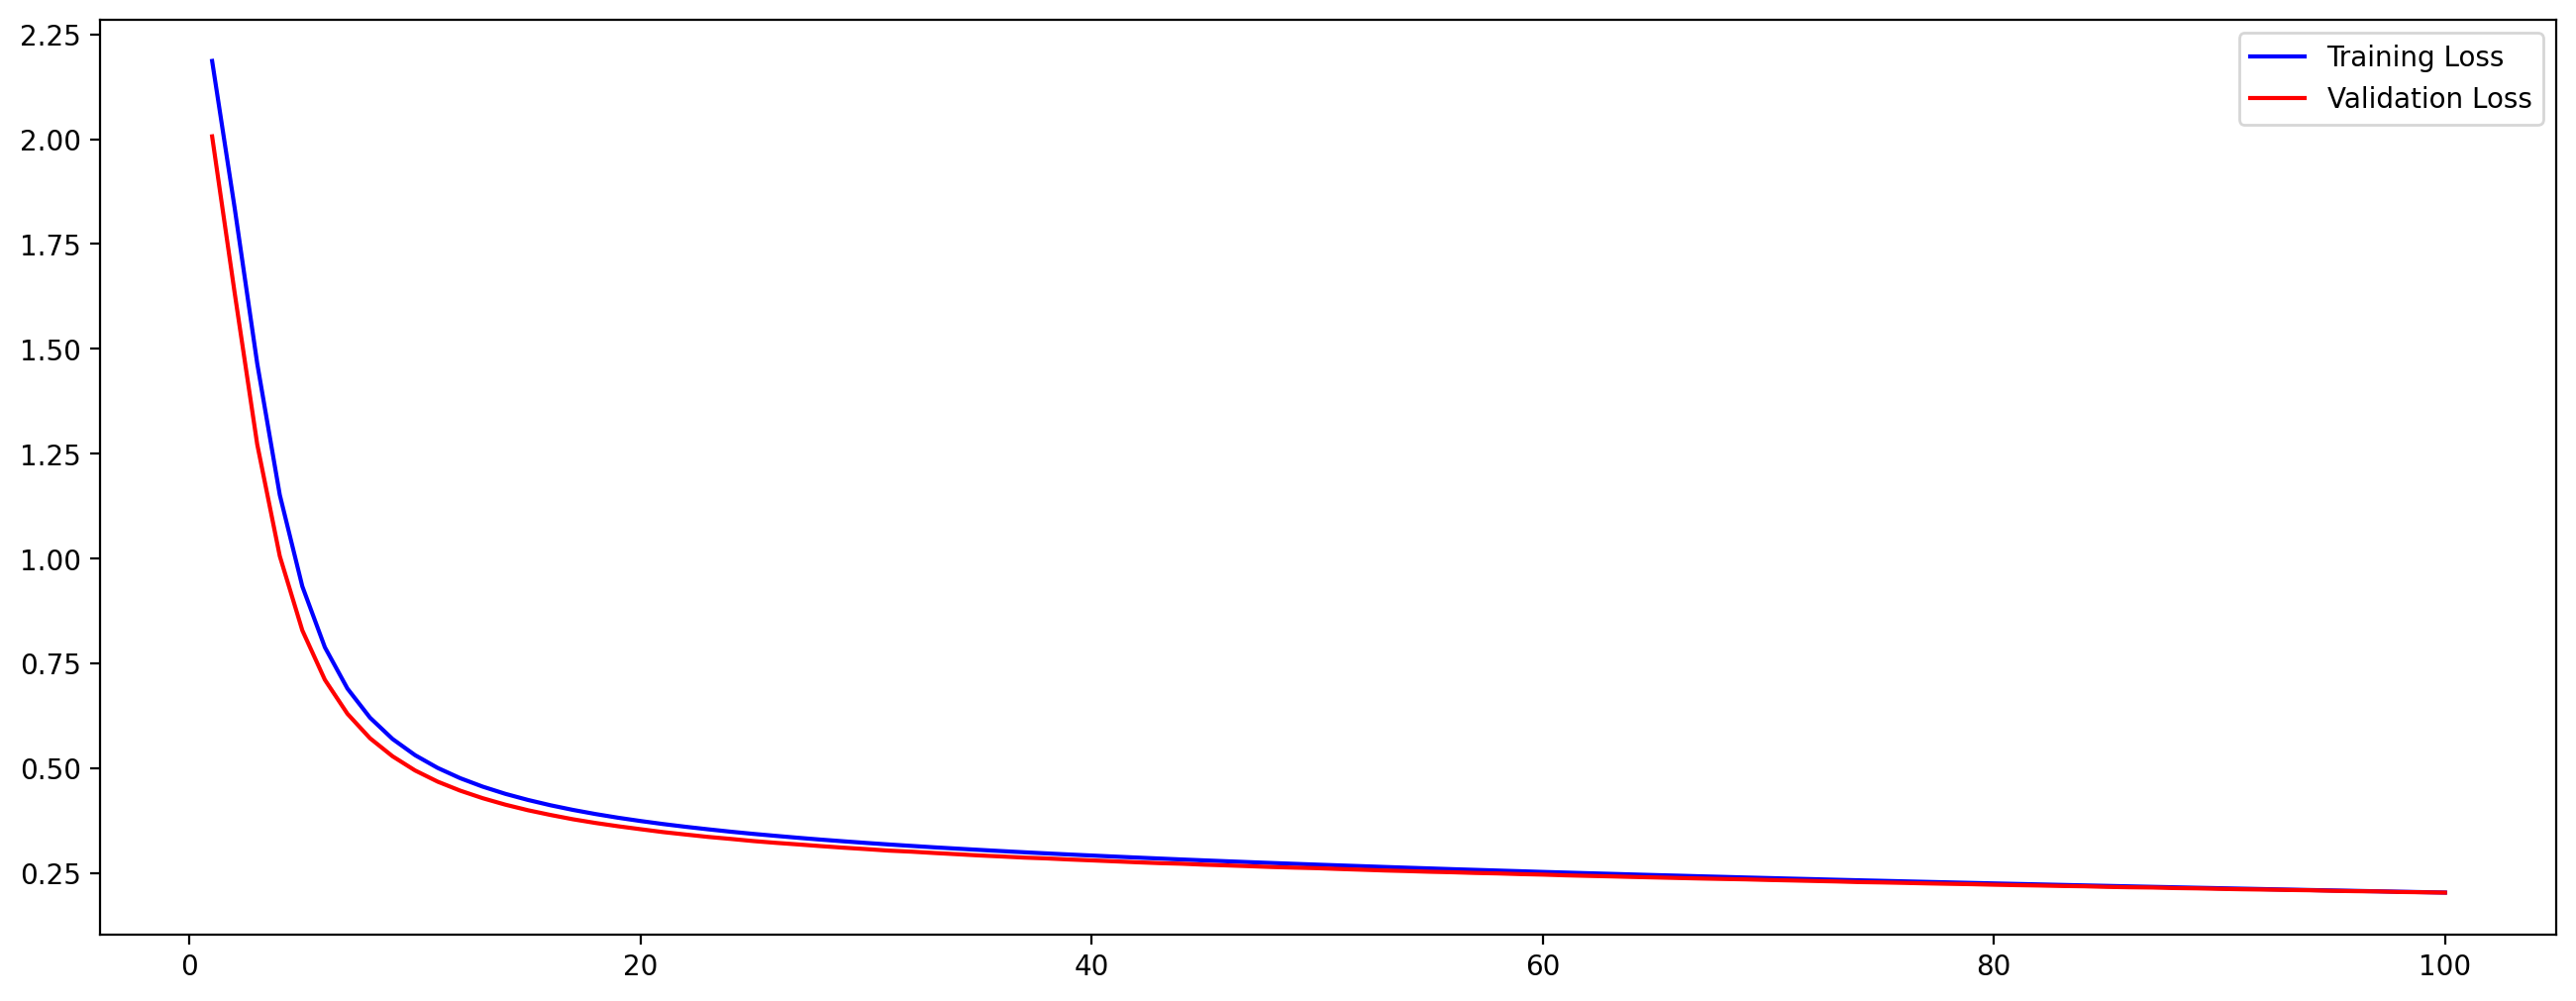

In [19]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend() #plot loss

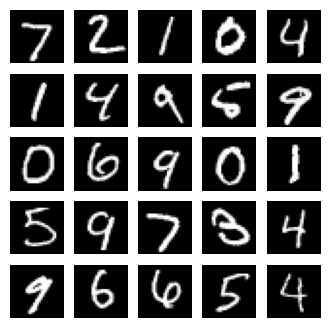

In [20]:
plt.figure(figsize = (4,4))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_test[i], cmap = 'gray')
  plt.axis('off')

In [21]:
def predict_digit(x):
  digit = model.predict(x)
  digit = np.argmax(digit)
  print('The digit is the given iamge is : ', digit)

In [23]:
predict_digit(x_test[0:1]) #prediction

1/1 [==============================] - 0s 34ms/step
The digit is the given iamge is :  7
